**Data processing:**

**1.Load the packages:**

We used ‘numpy’ (np) and pandas (pd) for general and numerical data analysis, ‘pyplot’ (plt) for data visualization, ‘stopwords’ and ‘punkt’ in ‘NLTK’ and ‘string’ for text mining.


In [4]:
# to ignore warning messages
# source: https://stackoverflow.com/questions/14463277/how-to-disable-python-warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

**And we loaded ‘warnings’ to ignore those annoying future warnings to protect our mental health. We imported ‘contractions’ to convert contractions into full forms to make our text mining more accurate.**

In [5]:
import string

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
!pip install contractions
import contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 7.3 MB/s eta 0:00:00


In [8]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [9]:
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


**2.Read the data:**

We imported three csv files using pd.read_csv and stored into major_group, public_firms and text_data





In [10]:
major_groups=pd.read_csv('/content/major_groups.csv')

In [82]:
major_groups.head()

,major_group,description
0,1,Agricultural Production Crops
1,2,Agriculture production livestock and animal sp...
2,7,Agricultural Services
3,8,Forestry
4,9,Fishing hunting and trapping


In [83]:
public_firms=pd.read_csv('/content/public_firms.csv')
public_firms.head()

,gvkey,fyear,location,conm,ipodate,sic,prcc_c,ch,ni,asset,sale,roa
0,1004,1994,USA,AAR CORP,1988/01/01,5080,13.375,22.487,10.463,425.814,451.395,0.024572
1,1004,1995,USA,AAR CORP,1988/01/01,5080,22.000,33.606,16.012,437.846,504.990,0.036570
2,1004,1996,USA,AAR CORP,1988/01/01,5080,30.250,51.705,23.025,529.584,589.328,0.043478
3,1004,1997,USA,AAR CORP,1988/01/01,5080,38.750,17.222,35.657,670.559,782.123,0.053175
4,1004,1998,USA,AAR CORP,1988/01/01,5080,23.875,8.250,41.671,726.630,918.036,0.057348


In [13]:
text_data=pd.read_csv('/content/2020_10K_item1_full.csv')

In [14]:
text_data

,cik,year,name,item_1_text,gvkey
0,1041588,2020,ACCESS-POWER INC,fixed expenses are previosuly documented in an...,66119
1,315374,2020,HURCO COMPANIES INC,"General Hurco Companies, Inc. is an internatio...",5788
2,1622996,2020,"ACRO BIOMEDICAL CO., LTD.",We have been engaged in the business of develo...,27584
3,1191334,2020,Chun Can Capital Group,CORPORATE HISTORY Chun Can Capital Group (form...,153614
4,1191334,2020,Chun Can Capital Group,CORPORATE HISTORY Chun Can Capital Group (form...,153614
...,...,...,...,...,...
5476,740664,2020,R F INDUSTRIES LTD,"General RF Industries, Ltd. (together with sub...",2829
5477,1074828,2020,"KNOW LABS, INC.","BACKGROUND AND CAPITAL STRUCTURE Know Labs, In...",166430
5478,40570,2020,GEE Group Inc.,"General GEE Group Inc. (the Company , us , ...",5050
5479,1341726,2020,"GULFSLOPE ENERGY, INC.","General GulfSlope Energy, Inc. is an independe...",175595


**Exploratory data analysis (EDA)**

Our group chose real estate industry whose industry number is 65. We first select all real estate firms from public_firms by selecting firms with sic over or equal to 6500 and(use np.logical_and )  less and equal to 6599, then stored it into ‘ Industry_data’. We immediately checked if the data was clean and have nullish value.

In [15]:
Industry_data=public_firms[np.logical_and(public_firms['sic']>=6500,public_firms['sic']<=6599)]

In [84]:
Industry_data.head()

,gvkey,fyear,location,conm,ipodate,sic,prcc_c,ch,ni,asset,sale,roa
901,1233,1995,USA,ALASKA NORTHWEST PROPERTIES,NaN,6512,242.000,0.148,-0.098,9.754,0.313,-0.010047
1272,1332,1995,USA,ASIA SUPERNET CORP,NaN,6513,6.500,0.055,-1.973,1.724,0.634,-1.144432
1273,1332,1996,USA,ASIA SUPERNET CORP,NaN,6513,0.687,0.170,-2.288,10.625,2.050,-0.215341
1274,1332,1997,USA,ASIA SUPERNET CORP,NaN,6513,0.110,0.036,-1.393,2.388,0.347,-0.583333
1275,1332,1998,USA,ASIA SUPERNET CORP,NaN,6513,0.045,0.045,-1.077,1.216,0.307,-0.885691


 We found that there are many null value in ipo date , prcc_c, ni, sale,and roa.

In [17]:
Industry_data.isnull().sum()

gvkey          0
fyear          0
location       0
conm           0
ipodate     1326
sic            0
prcc_c       239
ch            56
ni            74
asset          0
sale          74
roa           74
dtype: int64

There are Null values in the some of columns of data.</br>
Columns:- ipodate, prcc_c, ni, sale, roa

In [18]:
Industry_data.shape

(2294, 12)

**a.	How many unique firm-year ("fyear") observations are there in the filtered dataset?**

**b.	How many unique firms are there in the filtered dataset?**

**c.	How many firms in the filtered dataset have records over all 27 years (1994-2020)?**

We used ‘ .nunique（）’ method
( https://practicaldatascience.co.uk/data-science/how-to-identify-and-count-unique-values-in-pandas ) to count unique value in column ‘fyear’ and ‘conm’.

In [19]:
#a. How many unique firm-year ("fyear") observations are there in the filtered dataset?
Industry_data.fyear.nunique()

27

In [20]:
#b. How many unique firms are there in the filtered dataset?
Industry_data.conm.nunique()

248

For the third question ‘ how many firms have records over all 27 years’, we developed two different methods to do.
In the first method, we first group those firms by their company name, and count how many items we have in ‘fyear’. Then we test if this value equals to 27, which means it has 27 years recorded. This step will output a series of Boolean. If we sum them up, it will show how many true values we have, which is identically the number of firms which has 27 years records. For the second part, we can also use ‘.count()’ again we count how many true value.


In [21]:
#c. How many firms in the filtered dataset have records over all 27 years (1994-2020)?
firms_with_allyears=Industry_data.groupby('conm')['fyear'].count()==27
firms_with_allyears[firms_with_allyears==True].count()

3

**1) What are the top 10 firms with the highest stock price (column "prcc_c") in the year 2020?** </br>
**2) What are the top 10 firms with the highest sales (column "sale") in the entire history of the dataset?** </br>
**3) What is the geographical distribution (column "location") of all the firms? In other words, how many firms are there in each location? Please list the top 10 locations.**</br>
**4) Create a line chart to show the average stock price (column "prcc_c") in the selected sector(s) across the years. If you have selected multiple sectors, draw multiple lines to show them separately.**</br>
**5) Which firm was affected the most by the 2008 Financial Crisis, as measured by the percentage drop in stock price from 2007 to 2008?**</br>
**6) Plot the average Return on Assets (ROA) for the firms located in the “USA” across the years. ROA is calculated as ni/asset.**




In [22]:
Industry_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2294 entries, 901 to 207473
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   gvkey     2294 non-null   int64  
 1   fyear     2294 non-null   int64  
 2   location  2294 non-null   object 
 3   conm      2294 non-null   object 
 4   ipodate   968 non-null    object 
 5   sic       2294 non-null   int64  
 6   prcc_c    2055 non-null   float64
 7   ch        2238 non-null   float64
 8   ni        2220 non-null   float64
 9   asset     2294 non-null   float64
 10  sale      2220 non-null   float64
 11  roa       2220 non-null   float64
dtypes: float64(6), int64(3), object(3)
memory usage: 233.0+ KB


To get the top 10 stock price company in 2020, we first select all the data from 2020 by conducting logical selection. Then we use ‘ sort_values’ to rearrange the order by column ‘ prcc_c’ and get the top 10 values.

In [23]:
#Q1
Industry_data[Industry_data['fyear']==2020][['conm','prcc_c']].sort_values(by='prcc_c',ascending=False)[:10]

,conm,prcc_c
140073,JONES LANG LASALLE INC,148.3700
81594,FIRSTSERVICE CORP,136.7600
96857,COLLIERS INTL GROUP INC,89.1300
201704,HOWARD HUGHES CORP,78.9300
113273,REDFIN CORP,68.6300
69227,EXP WORLD HOLDINGS INC,63.1200
207473,CBRE GROUP INC,62.7200
116719,KE HOLDINGS INC -ADR,61.5400
57240,NEW ENGLAND REALTY ASSC -LP,50.1569
49538,FRP HOLDINGS INC,45.5500


To calculate the sum of all the sale in history for each company, we used ‘.sum()’ function for ‘sale’ column with data grouped by their company name. Then to select top 10 values, we used ‘ sort_values’ to rearrange the order by column ‘ sale’ and sliced first 10 values.

In [24]:
#Q2
Industry_data[['conm','sale']].groupby('conm')[['sale']].sum().sort_values(by='sale',ascending=False)[:10]

,sale
conm,
CBRE GROUP INC,114187.719
JONES LANG LASALLE INC,92400.971
REALOGY HOLDINGS CORP,87239.000
BROOKFIELD PROPERTY PRTRS LP,55926.000
CUSHMAN & WAKEFIELD,37954.200
COLLIERS INTL GROUP INC,36394.664
ALON BLUE SQUARE ISRAEL,35981.525
TRAVEL PLUS LEISURE CO,33608.000
BROOKFIELD OFFICE PPTYS INC,28106.000


Similar as we did for the last question, we use ‘count()’ function for ‘conm’ column with data grouped by ‘location’ column. After this step we can get how many companies are there in one location. Then we rearrange and slice out the top 10 locations.

In [25]:
#Q3
Industry_data.groupby('location')[['conm']].count().sort_values(by='conm',ascending=False)[:10]

,conm
location,
USA,1898
CHN,141
ISR,81
CAN,67
ARG,46
MEX,14
BMU,12
MYS,9
HKG,8


To draw the required line chart, first we prepared the data for average stock price for each year using ‘mean()’ function on stock price with data grouped by different fiscal years. Then we created chart using ‘ plt.’.

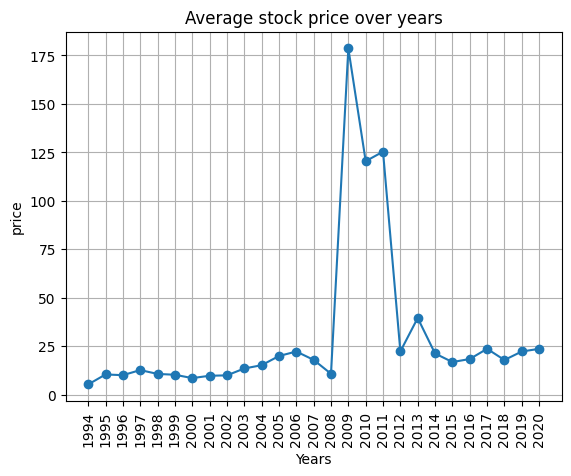

In [26]:
#Q4
plot_year=Industry_data.groupby('fyear')[['prcc_c']].mean()
plt.grid(True)
x=plot_year.index
y=plot_year['prcc_c']
plt.plot(x,y,marker='o')
plt.xticks(x,rotation=90)
plt.xlabel('Years')
plt.ylabel('price')
plt.title('Average stock price over years')
plt.show()

In [27]:
temp_data=Industry_data.loc[(Industry_data.fyear==2007) | (Industry_data.fyear==2008)]
cf=temp_data.groupby('conm')[['fyear']].nunique()
temp_data=temp_data[temp_data.conm.isin(cf[cf['fyear']==2].index.tolist())]
temp_data_pivot=temp_data.pivot(index='conm', columns='fyear', values='prcc_c')
temp_data_pivot['percentage_drop']=((temp_data_pivot[2007]-temp_data_pivot[2008])/temp_data_pivot[2007]) *100
temp_data_pivot.sort_values(by='percentage_drop',ascending=False)[:10]

fyear,2007,2008,percentage_drop
conm,,,
PILLARSTONE CAPITAL REIT,0.22,0.03,86.363636
ELBIT IMAGING LTD,54.81,8.61,84.291188
GREEN BUILDERS INC,1.40,0.22,84.285714
ILX RESORTS INC,3.50,0.59,83.142857
XINYUAN REAL ESTATE CO -ADR,14.23,2.44,82.853127
SILVERLEAF RESORTS INC,4.16,0.72,82.692308
GRUBB & ELLIS CO,6.41,1.24,80.655226
CBRE GROUP INC,21.55,4.32,79.953596
MAYS (J.W.) INC,22.15,4.50,79.683973


**The firm most affected by 2007 crisis is PILLARSTONE CAPITAL REIT**

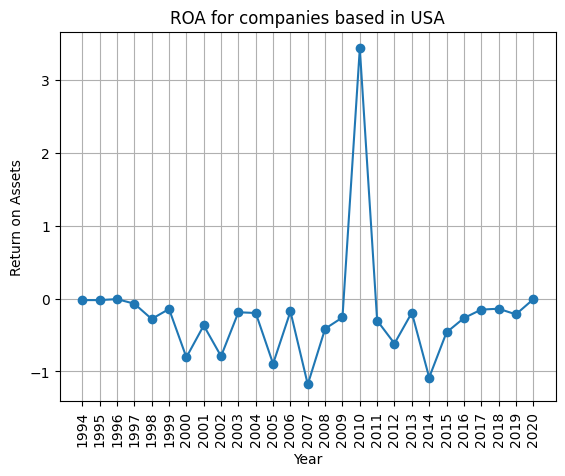

In [28]:
#Q6
temp=Industry_data[Industry_data['location']=='USA'].groupby('fyear')[['roa']].mean()
x=temp.index
y=temp['roa']
plt.plot(x,y,marker='o')
plt.xticks(x,rotation=90)
plt.grid(True)
plt.ylabel('Return on Assets')
plt.xlabel('Year')
plt.title('ROA for companies based in USA')
plt.show()

# Part 2. Text Analysis on the Industry Sector

**The file "data/2020_10K_item1_full.csv" contains a sample of 5,988 firms and their “item 1” content in their 10-K reports in the year 2020** <br>

**Load the dataset as a DataFrame and create a new column containing the cleaned text for each “item1” content.**

Follow the steps below to clean the text:

**1.	Convert all words to lowercase.**<br>
**2.	Remove punctuations.**<br>
**3.	Remove stop words based on the list of English stop words in NLTK.**<br>


In [29]:
text_data

,cik,year,name,item_1_text,gvkey
0,1041588,2020,ACCESS-POWER INC,fixed expenses are previosuly documented in an...,66119
1,315374,2020,HURCO COMPANIES INC,"General Hurco Companies, Inc. is an internatio...",5788
2,1622996,2020,"ACRO BIOMEDICAL CO., LTD.",We have been engaged in the business of develo...,27584
3,1191334,2020,Chun Can Capital Group,CORPORATE HISTORY Chun Can Capital Group (form...,153614
4,1191334,2020,Chun Can Capital Group,CORPORATE HISTORY Chun Can Capital Group (form...,153614
...,...,...,...,...,...
5476,740664,2020,R F INDUSTRIES LTD,"General RF Industries, Ltd. (together with sub...",2829
5477,1074828,2020,"KNOW LABS, INC.","BACKGROUND AND CAPITAL STRUCTURE Know Labs, In...",166430
5478,40570,2020,GEE Group Inc.,"General GEE Group Inc. (the Company , us , ...",5050
5479,1341726,2020,"GULFSLOPE ENERGY, INC.","General GulfSlope Energy, Inc. is an independe...",175595


In [30]:
text_data['Cleaned_text']=text_data['item_1_text'].apply(lambda x:x.lower())
text_data

,cik,year,name,item_1_text,gvkey,Cleaned_text
0,1041588,2020,ACCESS-POWER INC,fixed expenses are previosuly documented in an...,66119,fixed expenses are previosuly documented in an...
1,315374,2020,HURCO COMPANIES INC,"General Hurco Companies, Inc. is an internatio...",5788,"general hurco companies, inc. is an internatio..."
2,1622996,2020,"ACRO BIOMEDICAL CO., LTD.",We have been engaged in the business of develo...,27584,we have been engaged in the business of develo...
3,1191334,2020,Chun Can Capital Group,CORPORATE HISTORY Chun Can Capital Group (form...,153614,corporate history chun can capital group (form...
4,1191334,2020,Chun Can Capital Group,CORPORATE HISTORY Chun Can Capital Group (form...,153614,corporate history chun can capital group (form...
...,...,...,...,...,...,...
5476,740664,2020,R F INDUSTRIES LTD,"General RF Industries, Ltd. (together with sub...",2829,"general rf industries, ltd. (together with sub..."
5477,1074828,2020,"KNOW LABS, INC.","BACKGROUND AND CAPITAL STRUCTURE Know Labs, In...",166430,"background and capital structure know labs, in..."
5478,40570,2020,GEE Group Inc.,"General GEE Group Inc. (the Company , us , ...",5050,"general gee group inc. (the company , us , ..."
5479,1341726,2020,"GULFSLOPE ENERGY, INC.","General GulfSlope Energy, Inc. is an independe...",175595,"general gulfslope energy, inc. is an independe..."


In [31]:
text_data['Cleaned_text']=text_data['Cleaned_text'].apply(lambda x:[contractions.fix(i) for i in x.split()])

In [85]:
text_data.head()

,cik,year,name,item_1_text,gvkey,Cleaned_text
0,1041588,2020,ACCESS-POWER INC,fixed expenses are previosuly documented in an...,66119,fixed expenses previosuly documented 8k 235000...
1,315374,2020,HURCO COMPANIES INC,"General Hurco Companies, Inc. is an internatio...",5788,general hurco companies inc international indu...
2,1622996,2020,"ACRO BIOMEDICAL CO., LTD.",We have been engaged in the business of develo...,27584,engaged business developing marketing products...
3,1191334,2020,Chun Can Capital Group,CORPORATE HISTORY Chun Can Capital Group (form...,153614,corporate history chun capital group formerly ...
4,1191334,2020,Chun Can Capital Group,CORPORATE HISTORY Chun Can Capital Group (form...,153614,corporate history chun capital group formerly ...


In [33]:
text_data['Cleaned_text']=text_data['Cleaned_text'].apply(lambda x:' '.join(x))

In [86]:
text_data.head()

,cik,year,name,item_1_text,gvkey,Cleaned_text
0,1041588,2020,ACCESS-POWER INC,fixed expenses are previosuly documented in an...,66119,fixed expenses previosuly documented 8k 235000...
1,315374,2020,HURCO COMPANIES INC,"General Hurco Companies, Inc. is an internatio...",5788,general hurco companies inc international indu...
2,1622996,2020,"ACRO BIOMEDICAL CO., LTD.",We have been engaged in the business of develo...,27584,engaged business developing marketing products...
3,1191334,2020,Chun Can Capital Group,CORPORATE HISTORY Chun Can Capital Group (form...,153614,corporate history chun capital group formerly ...
4,1191334,2020,Chun Can Capital Group,CORPORATE HISTORY Chun Can Capital Group (form...,153614,corporate history chun capital group formerly ...


In [35]:
translator = str.maketrans('', '', string.punctuation)

In [36]:
text_data['Cleaned_text']=text_data['Cleaned_text'].apply(lambda x:x.translate(translator))

In [37]:
text_data

,cik,year,name,item_1_text,gvkey,Cleaned_text
0,1041588,2020,ACCESS-POWER INC,fixed expenses are previosuly documented in an...,66119,fixed expenses are previosuly documented in an...
1,315374,2020,HURCO COMPANIES INC,"General Hurco Companies, Inc. is an internatio...",5788,general hurco companies inc is an internationa...
2,1622996,2020,"ACRO BIOMEDICAL CO., LTD.",We have been engaged in the business of develo...,27584,we have been engaged in the business of develo...
3,1191334,2020,Chun Can Capital Group,CORPORATE HISTORY Chun Can Capital Group (form...,153614,corporate history chun can capital group forme...
4,1191334,2020,Chun Can Capital Group,CORPORATE HISTORY Chun Can Capital Group (form...,153614,corporate history chun can capital group forme...
...,...,...,...,...,...,...
5476,740664,2020,R F INDUSTRIES LTD,"General RF Industries, Ltd. (together with sub...",2829,general rf industries ltd together with subsid...
5477,1074828,2020,"KNOW LABS, INC.","BACKGROUND AND CAPITAL STRUCTURE Know Labs, In...",166430,background and capital structure know labs inc...
5478,40570,2020,GEE Group Inc.,"General GEE Group Inc. (the Company , us , ...",5050,general gee group inc the company us our or ...
5479,1341726,2020,"GULFSLOPE ENERGY, INC.","General GulfSlope Energy, Inc. is an independe...",175595,general gulfslope energy inc is an independent...


In [38]:
stop_words = set(stopwords.words('english'))

In [39]:
text_data

,cik,year,name,item_1_text,gvkey,Cleaned_text
0,1041588,2020,ACCESS-POWER INC,fixed expenses are previosuly documented in an...,66119,fixed expenses are previosuly documented in an...
1,315374,2020,HURCO COMPANIES INC,"General Hurco Companies, Inc. is an internatio...",5788,general hurco companies inc is an internationa...
2,1622996,2020,"ACRO BIOMEDICAL CO., LTD.",We have been engaged in the business of develo...,27584,we have been engaged in the business of develo...
3,1191334,2020,Chun Can Capital Group,CORPORATE HISTORY Chun Can Capital Group (form...,153614,corporate history chun can capital group forme...
4,1191334,2020,Chun Can Capital Group,CORPORATE HISTORY Chun Can Capital Group (form...,153614,corporate history chun can capital group forme...
...,...,...,...,...,...,...
5476,740664,2020,R F INDUSTRIES LTD,"General RF Industries, Ltd. (together with sub...",2829,general rf industries ltd together with subsid...
5477,1074828,2020,"KNOW LABS, INC.","BACKGROUND AND CAPITAL STRUCTURE Know Labs, In...",166430,background and capital structure know labs inc...
5478,40570,2020,GEE Group Inc.,"General GEE Group Inc. (the Company , us , ...",5050,general gee group inc the company us our or ...
5479,1341726,2020,"GULFSLOPE ENERGY, INC.","General GulfSlope Energy, Inc. is an independe...",175595,general gulfslope energy inc is an independent...


In [40]:
text_data['Cleaned_text']=text_data['Cleaned_text'].apply(lambda x:[i for i in x.split() if i not in stop_words])

In [41]:
text_data

,cik,year,name,item_1_text,gvkey,Cleaned_text
0,1041588,2020,ACCESS-POWER INC,fixed expenses are previosuly documented in an...,66119,"[fixed, expenses, previosuly, documented, 8k, ..."
1,315374,2020,HURCO COMPANIES INC,"General Hurco Companies, Inc. is an internatio...",5788,"[general, hurco, companies, inc, international..."
2,1622996,2020,"ACRO BIOMEDICAL CO., LTD.",We have been engaged in the business of develo...,27584,"[engaged, business, developing, marketing, pro..."
3,1191334,2020,Chun Can Capital Group,CORPORATE HISTORY Chun Can Capital Group (form...,153614,"[corporate, history, chun, capital, group, for..."
4,1191334,2020,Chun Can Capital Group,CORPORATE HISTORY Chun Can Capital Group (form...,153614,"[corporate, history, chun, capital, group, for..."
...,...,...,...,...,...,...
5476,740664,2020,R F INDUSTRIES LTD,"General RF Industries, Ltd. (together with sub...",2829,"[general, rf, industries, ltd, together, subsi..."
5477,1074828,2020,"KNOW LABS, INC.","BACKGROUND AND CAPITAL STRUCTURE Know Labs, In...",166430,"[background, capital, structure, know, labs, i..."
5478,40570,2020,GEE Group Inc.,"General GEE Group Inc. (the Company , us , ...",5050,"[general, gee, group, inc, company, us, incorp..."
5479,1341726,2020,"GULFSLOPE ENERGY, INC.","General GulfSlope Energy, Inc. is an independe...",175595,"[general, gulfslope, energy, inc, independent,..."


In [42]:
text_data['Cleaned_text']=text_data['Cleaned_text'].apply(lambda x:' '.join(x))

In [87]:
text_data.head()

,cik,year,name,item_1_text,gvkey,Cleaned_text
0,1041588,2020,ACCESS-POWER INC,fixed expenses are previosuly documented in an...,66119,fixed expenses previosuly documented 8k 235000...
1,315374,2020,HURCO COMPANIES INC,"General Hurco Companies, Inc. is an internatio...",5788,general hurco companies inc international indu...
2,1622996,2020,"ACRO BIOMEDICAL CO., LTD.",We have been engaged in the business of develo...,27584,engaged business developing marketing products...
3,1191334,2020,Chun Can Capital Group,CORPORATE HISTORY Chun Can Capital Group (form...,153614,corporate history chun capital group formerly ...
4,1191334,2020,Chun Can Capital Group,CORPORATE HISTORY Chun Can Capital Group (form...,153614,corporate history chun capital group formerly ...


# KEYWORD ANALYSIS

Conduct keywords analysis on your selected industry sector(s). Follow the steps below to complete the analysis:</br>
1.	Create a new DataFrame that includes only firms in your selected industry sectors. Ensure that you merge the 10-K data with the previous "public_firm.csv" data using an inner join.</br>
2.	Generate the top 10 keywords for each firm based on two different methods: word counts and TF-IDF score.</br>
3.	Create two wordclouds to visualize the keywords across all firms in the selected sector: one based on the word count of keywords and another based on the TF-IDF score.</br>


In [44]:
from collections import Counter

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [46]:
Industry_data_10K=pd.merge(Industry_data,text_data,on='gvkey',how='inner')

In [47]:
Industry_data_10K

,gvkey,fyear,location,conm,ipodate,sic,prcc_c,ch,ni,asset,sale,roa,cik,year,name,item_1_text,Cleaned_text
0,1545,1995,USA,AMERICAN REALTY INVESTORS,NaN,6512,14.750,1.054,-2.836,162.033,22.952,-0.017503,1102238,2020,AMERICAN REALTY INVESTORS INC,"General As used herein, the terms ARL, the ...",general used herein terms arl company us refer...
1,1545,1996,USA,AMERICAN REALTY INVESTORS,NaN,6512,13.000,1.254,-5.554,235.037,26.979,-0.023630,1102238,2020,AMERICAN REALTY INVESTORS INC,"General As used herein, the terms ARL, the ...",general used herein terms arl company us refer...
2,1545,1997,USA,AMERICAN REALTY INVESTORS,NaN,6512,14.375,5.347,-2.428,433.799,49.971,-0.005597,1102238,2020,AMERICAN REALTY INVESTORS INC,"General As used herein, the terms ARL, the ...",general used herein terms arl company us refer...
3,1545,1998,USA,AMERICAN REALTY INVESTORS,NaN,6512,16.375,11.523,-22.805,918.605,87.086,-0.024826,1102238,2020,AMERICAN REALTY INVESTORS INC,"General As used herein, the terms ARL, the ...",general used herein terms arl company us refer...
4,1545,1999,USA,AMERICAN REALTY INVESTORS,NaN,6512,17.000,2.479,10.298,919.546,193.980,0.011199,1102238,2020,AMERICAN REALTY INVESTORS INC,"General As used herein, the terms ARL, the ...",general used herein terms arl company us refer...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
791,260774,2016,USA,CBRE GROUP INC,2004/06/10,6500,31.490,762.576,571.973,10779.587,13071.589,0.053061,1138118,2020,"CBRE GROUP, INC.","Company Overview CBRE Group, Inc. is a Delawar...",company overview cbre group inc delaware corpo...
792,260774,2017,USA,CBRE GROUP INC,2004/06/10,6500,43.310,751.774,691.479,11483.830,14209.608,0.060213,1138118,2020,"CBRE GROUP, INC.","Company Overview CBRE Group, Inc. is a Delawar...",company overview cbre group inc delaware corpo...
793,260774,2018,USA,CBRE GROUP INC,2004/06/10,6500,40.040,777.219,NaN,13456.793,NaN,NaN,1138118,2020,"CBRE GROUP, INC.","Company Overview CBRE Group, Inc. is a Delawar...",company overview cbre group inc delaware corpo...
794,260774,2019,USA,CBRE GROUP INC,2004/06/10,6500,61.290,971.781,1282.357,16197.196,23894.091,0.079172,1138118,2020,"CBRE GROUP, INC.","Company Overview CBRE Group, Inc. is a Delawar...",company overview cbre group inc delaware corpo...


In [48]:
def top_10(text):
  temp=[]
  c= Counter(text.split())
  for i in c.most_common(10):
    temp.append(i[0])
  return ' '.join(temp)

In [49]:
Industry_data_10K['top_10_keywords_wc']=Industry_data_10K['Cleaned_text'].apply(lambda x:top_10(x))

In [51]:
def get_keywords_tfidf(document_list):
    '''
    Input: A list of documents (text)
    Output: The corresponding top 10 keywords for each document based on tf-idf values
    '''

    # Step 1: Create the TF-IDF vectorizer
    vectorizer = TfidfVectorizer()

    # Step 2: Calculate the TF-IDF matrix
    tfidf_matrix = vectorizer.fit_transform(document_list)

    # Step 3: Get feature names (words)
    feature_names = vectorizer.get_feature_names_out()

    # Step 4: Extract top 10 keywords for each text
    top_keywords = []
    for i in range(len(document_list)):

        if i %100 == 0:
            print(f'Processing the {i}/{len(document_list)} document.')

        feature_index = tfidf_matrix[i, :].nonzero()[1]
        tfidf_scores = zip(feature_index, [tfidf_matrix[i, x] for x in feature_index])
        sorted_tfidf_scores = sorted(tfidf_scores, key=lambda x: x[1], reverse=True)
        top_keywords.append(' '.join([feature_names[i] for i, _ in sorted_tfidf_scores[:10]]))

    return top_keywords

In [52]:
Industry_data_10K['top_10_keywords_tfidf']=get_keywords_tfidf(Industry_data_10K['Cleaned_text'].tolist())

Processing the 0/796 document.
Processing the 100/796 document.
Processing the 200/796 document.
Processing the 300/796 document.
Processing the 400/796 document.
Processing the 500/796 document.
Processing the 600/796 document.
Processing the 700/796 document.


In [53]:
Industry_data_10K.head()

,gvkey,fyear,location,conm,ipodate,sic,prcc_c,ch,ni,asset,sale,roa,cik,year,name,item_1_text,Cleaned_text,top_10_keywords_wc,top_10_keywords_tfidf
0,1545,1995,USA,AMERICAN REALTY INVESTORS,NaN,6512,14.750,1.054,-2.836,162.033,22.952,-0.017503,1102238,2020,AMERICAN REALTY INVESTORS INC,"General As used herein, the terms ARL, the ...",general used herein terms arl company us refer...,properties arl real million may estate land al...,arl tci ior properties pillar land million rea...
1,1545,1996,USA,AMERICAN REALTY INVESTORS,NaN,6512,13.000,1.254,-5.554,235.037,26.979,-0.023630,1102238,2020,AMERICAN REALTY INVESTORS INC,"General As used herein, the terms ARL, the ...",general used herein terms arl company us refer...,properties arl real million may estate land al...,arl tci ior properties pillar land million rea...
2,1545,1997,USA,AMERICAN REALTY INVESTORS,NaN,6512,14.375,5.347,-2.428,433.799,49.971,-0.005597,1102238,2020,AMERICAN REALTY INVESTORS INC,"General As used herein, the terms ARL, the ...",general used herein terms arl company us refer...,properties arl real million may estate land al...,arl tci ior properties pillar land million rea...
3,1545,1998,USA,AMERICAN REALTY INVESTORS,NaN,6512,16.375,11.523,-22.805,918.605,87.086,-0.024826,1102238,2020,AMERICAN REALTY INVESTORS INC,"General As used herein, the terms ARL, the ...",general used herein terms arl company us refer...,properties arl real million may estate land al...,arl tci ior properties pillar land million rea...
4,1545,1999,USA,AMERICAN REALTY INVESTORS,NaN,6512,17.000,2.479,10.298,919.546,193.980,0.011199,1102238,2020,AMERICAN REALTY INVESTORS INC,"General As used herein, the terms ARL, the ...",general used herein terms arl company us refer...,properties arl real million may estate land al...,arl tci ior properties pillar land million rea...


In [54]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [55]:
text1 = ' '.join(Industry_data_10K['top_10_keywords_wc'].tolist())
text2 = ' '.join(Industry_data_10K['top_10_keywords_tfidf'].tolist())

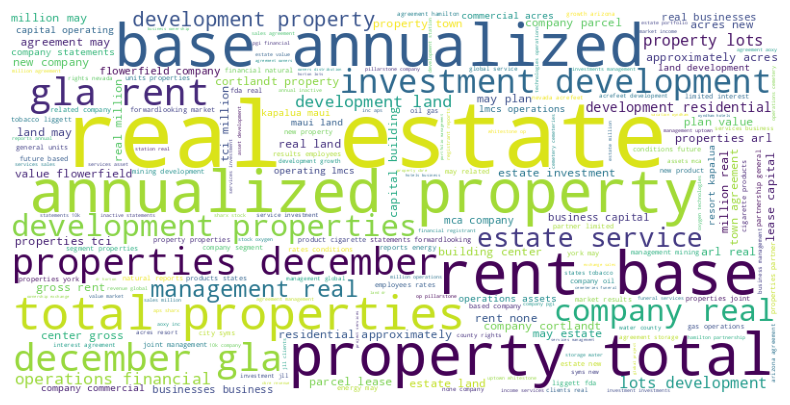

In [56]:
wordcloud1 = WordCloud(width=800, height=400, background_color='white').generate(text1) # note that text is a string, not a list

plt.figure(figsize=(10,5))
plt.imshow(wordcloud1)
plt.savefig('keyword_wc.png') # save as PNG file
plt.axis('off')

plt.show()

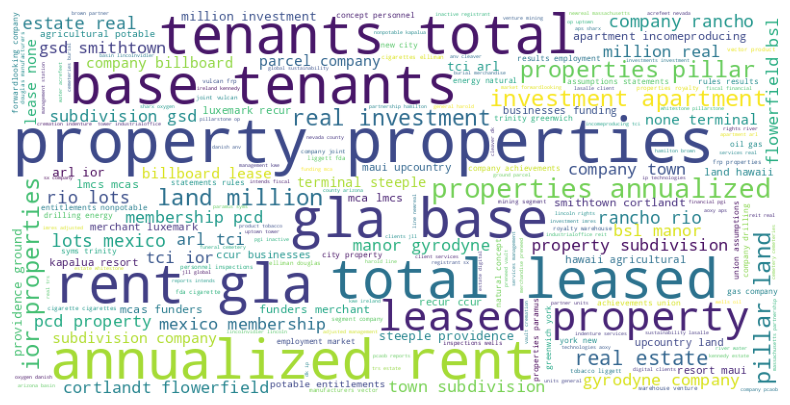

In [57]:
wordcloud2 = WordCloud(width=800, height=400, background_color='white').generate(text2) # note that text is a string, not a list

plt.figure(figsize=(10,5))
plt.imshow(wordcloud2)
plt.savefig('keyword_tfidf.png') # save as PNG file
plt.axis('off')

plt.show()

# WORD EMBEDDING

In [58]:
!pip install gensim

In [59]:
import pandas as pd
from gensim.models import Word2Vec

In [60]:
text_data['Cleaned_text']

0       fixed expenses previosuly documented 8k 235000...
1       general hurco companies inc international indu...
2       engaged business developing marketing products...
3       corporate history chun capital group formerly ...
4       corporate history chun capital group formerly ...
                              ...                        
5476    general rf industries ltd together subsidiarie...
5477    background capital structure know labs inc inc...
5478    general gee group inc company us incorporated ...
5479    general gulfslope energy inc independent crude...
5480    general development business north european oi...
Name: Cleaned_text, Length: 5481, dtype: object

In [61]:
training_data = [row.split() for row in text_data['Cleaned_text']]

vector_size: The number of dimensions of the embeddings and the default is 100.</br>
window: The maximum distance between a target word and words around the target word. The default window is 5.</br>
min_count: The minimum count of words to consider when training the model; words with occurrence less than this count will be ignored. The default for min_count is 5.</br>
workers: The number of partitions during training and the default workers is 3.</br>
sg: The training algorithm, either CBOW(0) or skip gram (1). The default training alogrithm is CBOW.</br>

In [62]:
model = Word2Vec(training_data, min_count=1, vector_size=50, \
                 workers=3, window=3, sg = 1)

In [63]:
model.save("word2vec.model")

In [64]:
model = Word2Vec.load("word2vec.model")

Three words taken </br>


1.   property
2.   rent
3.   annualized



In [65]:
model.wv.most_similar('property')[:5]

[('intellectual', 0.892647922039032),
 ('solelyowned', 0.849632203578949),
 ('propertywe', 0.847829282283783),
 ('properties', 0.8108606934547424),
 ('propertyour', 0.80872642993927)]

In [66]:
model.wv.most_similar('rent')[:5]

[('rents', 0.8823137879371643),
 ('tenant', 0.8512459993362427),
 ('rental', 0.8475881218910217),
 ('escalators', 0.8319989442825317),
 ('tenants', 0.8243418335914612)]

In [67]:
model.wv.most_similar('gla')[:5]

[('leasable', 0.8400735259056091),
 ('rentable', 0.7784969210624695),
 ('footage', 0.765652060508728),
 ('officeflex', 0.7625152468681335),
 ('bedsunits', 0.7554234266281128)]

# Firm Analysis and Strategy Suggestion

In [68]:
from DocumentSimilarity import DocumentSimilarity

In [69]:
d = DocumentSimilarity(model = model, gvkeys=Industry_data_10K['gvkey'], \
                       conm = Industry_data_10K['conm'],
                       keywordslist = Industry_data_10K['top_10_keywords_tfidf'])


In [70]:
from nltk.util import unique_list
unique_list(d.most_similar(firm = 260774, topn = 100))

[(260774, 'CBRE GROUP INC', 1.0),
 (260774, 'CBRE GROUP INC', 0.99999994),
 (33809, 'CUSHMAN & WAKEFIELD', 0.95443183),
 (65108, 'JONES LANG LASALLE INC', 0.94618034),
 (7092, 'CCUR HOLDINGS INC', 0.89089566),
 (25632, 'KENNEDY-WILSON HOLDINGS INC', 0.8772227),
 (32102, 'REDFIN CORP', 0.8677214)]

In [71]:
Competitor_data= Industry_data_10K.loc[(Industry_data_10K['gvkey']==260774) | (Industry_data_10K['gvkey']==33809) | (Industry_data_10K['gvkey']==65108) | (Industry_data_10K['gvkey']== 7092) | (Industry_data_10K['gvkey']== 25632) | (Industry_data_10K['gvkey']== 32102)]

In [89]:
Competitor_data.head()

,gvkey,fyear,location,conm,ipodate,sic,prcc_c,ch,ni,asset,sale,roa,cik,year,name,item_1_text,Cleaned_text,top_10_keywords_wc,top_10_keywords_tfidf
152,7092,1995,USA,CCUR HOLDINGS INC,NaN,6500,1.0940,5.728,-2.006,98.359,140.144,-0.020395,749038,2020,"CCUR Holdings, Inc.","Overview References herein to CCUR Holdings, ...",overview references herein ccur holdings compa...,mca company real businesses business capital o...,mca lmcs mcas funders merchant luxemark recur ...
153,7092,1996,USA,CCUR HOLDINGS INC,NaN,6500,1.9690,3.562,-39.712,80.214,95.800,-0.495076,749038,2020,"CCUR Holdings, Inc.","Overview References herein to CCUR Holdings, ...",overview references herein ccur holdings compa...,mca company real businesses business capital o...,mca lmcs mcas funders merchant luxemark recur ...
154,7092,1997,USA,CCUR HOLDINGS INC,NaN,6500,2.3440,4.024,4.061,63.528,108.367,0.063925,749038,2020,"CCUR Holdings, Inc.","Overview References herein to CCUR Holdings, ...",overview references herein ccur holdings compa...,mca company real businesses business capital o...,mca lmcs mcas funders merchant luxemark recur ...
155,7092,1998,USA,CCUR HOLDINGS INC,NaN,6500,3.5000,5.733,3.414,46.235,82.215,0.073840,749038,2020,"CCUR Holdings, Inc.","Overview References herein to CCUR Holdings, ...",overview references herein ccur holdings compa...,mca company real businesses business capital o...,mca lmcs mcas funders merchant luxemark recur ...
156,7092,1999,USA,CCUR HOLDINGS INC,NaN,6500,18.6875,6.872,-1.665,40.569,69.963,-0.041041,749038,2020,"CCUR Holdings, Inc.","Overview References herein to CCUR Holdings, ...",overview references herein ccur holdings compa...,mca company real businesses business capital o...,mca lmcs mcas funders merchant luxemark recur ...


In [73]:
Insights=Competitor_data.groupby('conm')[['roa','sale']].mean()

In [74]:
Insights

,roa,sale
conm,,
CBRE GROUP INC,0.025797,7136.732437
CCUR HOLDINGS INC,-0.041765,66.464462
CUSHMAN & WAKEFIELD,-0.035095,7590.840000
JONES LANG LASALLE INC,0.051478,4200.044136
KENNEDY-WILSON HOLDINGS INC,0.007463,205.619812
REDFIN CORP,-0.115039,496.229833




---


**Average return on asset for all competitors over the years**


Text(0, 0.5, 'Average Return on asset')

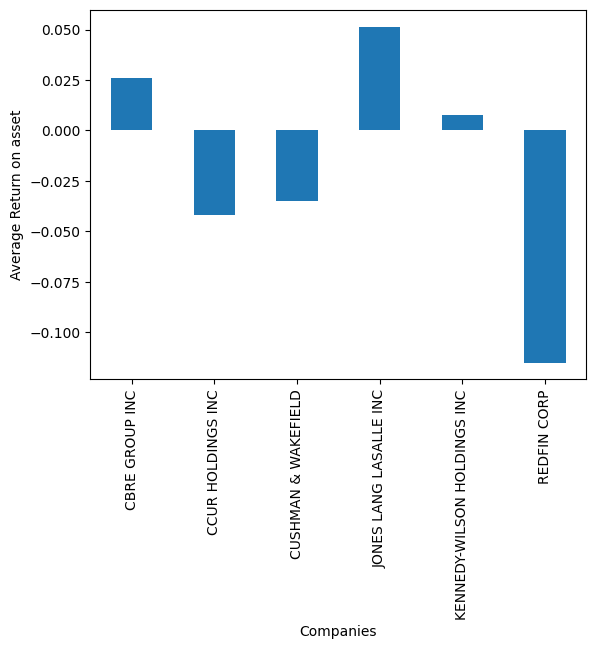

In [75]:
Insights['roa'].plot(kind='bar')
plt.xlabel('Companies')
plt.ylabel('Average Return on asset')



---


**In terms of return on assets, Jones Lang Lasalle has the highest ROA so we will compare JONES LANG LASALLE INC with CBRE GROUP INC**

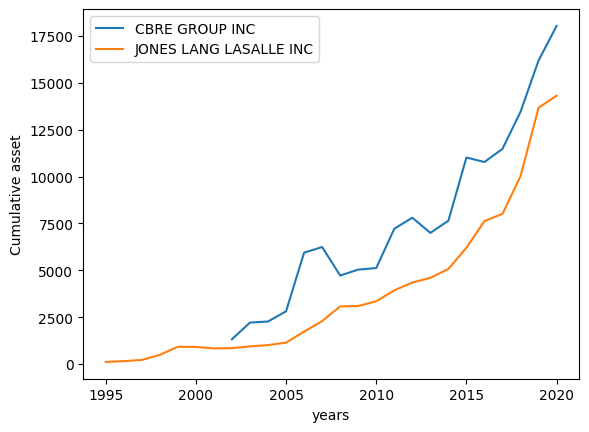

In [76]:
plt.plot(Competitor_data[Competitor_data.conm=='CBRE GROUP INC']['fyear'],Competitor_data[Competitor_data.conm=='CBRE GROUP INC']['asset'],label="CBRE GROUP INC")
plt.plot(Competitor_data[Competitor_data.conm=='JONES LANG LASALLE INC']['fyear'],Competitor_data[Competitor_data.conm=='JONES LANG LASALLE INC']['asset'],label="JONES LANG LASALLE INC")
plt.xlabel('years')
plt.ylabel('Cumulative asset')
plt.legend()
plt.show()

**There was an exponential growth in terms of assets for Jones Lang Lasalle INC**


---




**Average Sales of the companies over the years**

Text(0.5, 1.0, 'Average Sales of top competitors')

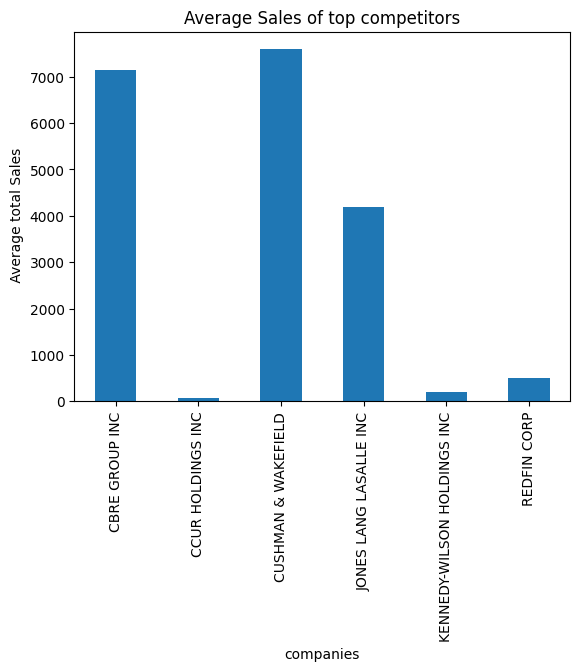

In [77]:
Insights['sale'].plot(kind='bar')
plt.xlabel('companies')
plt.ylabel(' Average total Sales')
plt.title('Average Sales of top competitors')

**As CUSHMAN & WAKEFIELD is major competitor in terms of sale, we will analyse asset distribution of CBRE GROUP INC and CUSHMAN & WAKEFIELD over the years**


---



**Comparison between CUSHMAN & WAKEFIELD and CBRE GROUP INC in terms of asset growth over the years**

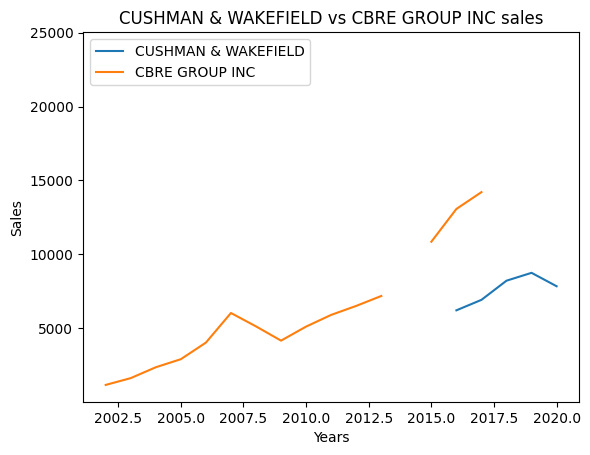

In [78]:
plt.plot(Competitor_data[Competitor_data.conm=='CUSHMAN & WAKEFIELD']['fyear'],Competitor_data[Competitor_data.conm=='CUSHMAN & WAKEFIELD']['sale'],label="CUSHMAN & WAKEFIELD")
plt.plot(Competitor_data[Competitor_data.conm=='CBRE GROUP INC']['fyear'],Competitor_data[Competitor_data.conm=='CBRE GROUP INC']['sale'],label="CBRE GROUP INC")
plt.legend()
plt.xlabel('Years')
plt.ylabel('Sales')
plt.title('CUSHMAN & WAKEFIELD vs CBRE GROUP INC sales')
plt.show()

**We can observe that Cushman & Wakefield is new company that entered the market in 2016.**</br>
**Despite entering late in the market, Cushman managed to make higher Average sales over short period of time than CBRE did in long period.**</br>
**In order to really compare the return on asset we have slice the timeline from 2016 to 2020 and compare ROA and sale**



In [79]:
Temp_data_2016_2020=Competitor_data.loc[((Competitor_data.conm=='CUSHMAN & WAKEFIELD') | (Competitor_data.conm=='CBRE GROUP INC')) & (Competitor_data.fyear>=2016)]

In [88]:
Temp_data_2016_2020.head()

,gvkey,fyear,location,conm,ipodate,sic,prcc_c,ch,ni,asset,sale,roa,cik,year,name,item_1_text,Cleaned_text,top_10_keywords_wc,top_10_keywords_tfidf
594,33809,2016,GBR,CUSHMAN & WAKEFIELD,2018/08/02,6531,NaN,382.3,-449.1,5681.9,6215.7,-0.079040,1628369,2020,Cushman & Wakefield plc,Cushman & Wakefield plc (together with its sub...,cushman wakefield plc together subsidiaries cu...,services real estate service revenue global ma...,wakefield cushman dtz services global clients ...
595,33809,2017,GBR,CUSHMAN & WAKEFIELD,2018/08/02,6531,NaN,405.6,-220.5,5797.9,6923.9,-0.038031,1628369,2020,Cushman & Wakefield plc,Cushman & Wakefield plc (together with its sub...,cushman wakefield plc together subsidiaries cu...,services real estate service revenue global ma...,wakefield cushman dtz services global clients ...
596,33809,2018,GBR,CUSHMAN & WAKEFIELD,2018/08/02,6531,14.47,895.3,-185.8,6546.0,8219.9,-0.028384,1628369,2020,Cushman & Wakefield plc,Cushman & Wakefield plc (together with its sub...,cushman wakefield plc together subsidiaries cu...,services real estate service revenue global ma...,wakefield cushman dtz services global clients ...
597,33809,2019,GBR,CUSHMAN & WAKEFIELD,2018/08/02,6531,20.44,813.2,0.2,7163.4,8751.0,0.000028,1628369,2020,Cushman & Wakefield plc,Cushman & Wakefield plc (together with its sub...,cushman wakefield plc together subsidiaries cu...,services real estate service revenue global ma...,wakefield cushman dtz services global clients ...
598,33809,2020,GBR,CUSHMAN & WAKEFIELD,2018/08/02,6531,14.83,1074.8,-220.5,7337.9,7843.7,-0.030049,1628369,2020,Cushman & Wakefield plc,Cushman & Wakefield plc (together with its sub...,cushman wakefield plc together subsidiaries cu...,services real estate service revenue global ma...,wakefield cushman dtz services global clients ...


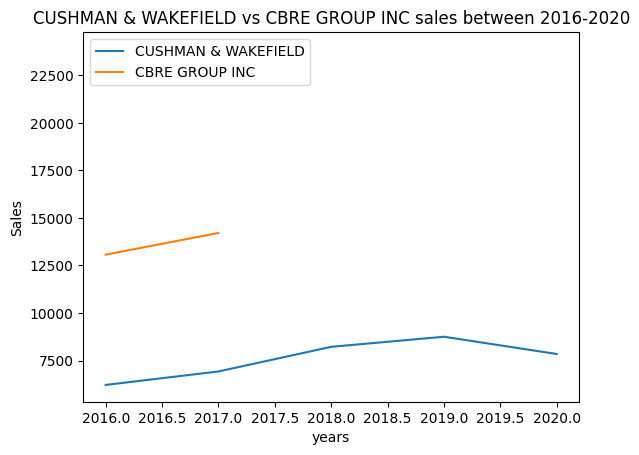

In [81]:
plt.plot(Temp_data_2016_2020[Temp_data_2016_2020.conm=='CUSHMAN & WAKEFIELD']['fyear'],Temp_data_2016_2020[Temp_data_2016_2020.conm=='CUSHMAN & WAKEFIELD']['sale'],label="CUSHMAN & WAKEFIELD")
plt.plot(Temp_data_2016_2020[Temp_data_2016_2020.conm=='CBRE GROUP INC']['fyear'],Temp_data_2016_2020[Temp_data_2016_2020.conm=='CBRE GROUP INC']['sale'],label="CBRE GROUP INC")
plt.xlabel('years')
plt.ylabel('Sales')
plt.title('CUSHMAN & WAKEFIELD vs CBRE GROUP INC sales between 2016-2020')
plt.legend()
plt.show()

**Previously we observed that Cushman got higher Average sales but when we deepen our analysis, we can observe that there are missing values in sales column of CBRE GROUP.**</br>
**This is an example of how visualization lie if the data is not intrinsically.**